In [1]:
import numpy as np
import random
import keras, os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

C:\Users\gupta\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\gupta\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gupta\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gupta\Anaconda3\lib\site-packages\tensorflow\python\framework\

In [2]:
# Loading data

train_data = r'C:\Users\gupta\Downloads\Image\train\train'
test_data = r'C:\Users\gupta\Downloads\Image\test1\test1'

train_dogs = ['C:/Users/gupta/Downloads/Image/train/train/{}'.format(i) for i in os.listdir(train_data) if 'dog' in i]
train_cats = ['C:/Users/gupta/Downloads/Image/train/train/{}'.format(i) for i in os.listdir(train_data) if 'cat' in i]

In [3]:
test_imgs = ['C:/Users/gupta/Downloads/Image/test1/test1/{}'.format(i) for i in os.listdir(test_data)]

In [4]:
print(len(test_imgs))
print(len(train_dogs))
print(len(train_cats))

12500
12500
12500


In [5]:
train_imgs = train_dogs[:1000] + train_cats[:1000]
random.shuffle(train_imgs)

del train_cats
del train_dogs
gc.collect()

7

In [6]:
# Declare image dimensions

nrows = 150
ncolumns = 150
channels = 3

In [7]:
#A function to read and process the images to an acceptable format for our model

def read_and_process_image(list_of_images):
    '''Returns two arrays:
        X is an array of resized images
        Y is an array of labels'''
    x = []  #images
    y = []  #labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR),(nrows,ncolumns),interpolation=cv2.INTER_CUBIC))
        
        if 'dog' in image:
            y.append(1)
        elif 'cat' in image:
            y.append(0)
            
    return x, y

In [8]:
x, y = read_and_process_image(train_imgs)

In [9]:
print(len(x))
print(len(y))

2000
2000


In [10]:
del train_imgs
gc.collect()

# Converting train set to array
x = np.array(x)
y = np.array(y)

Text(0.5,1,'Labels for Cats and Dogs')

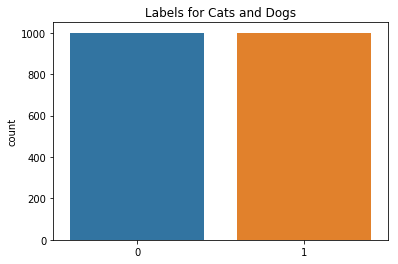

In [11]:
# plotting the labels

sns.countplot(y)
plt.title('Labels for Cats and Dogs')

In [12]:
print("train data")
print(x.shape)
print(y.shape)

train data
(2000, 150, 150, 3)
(2000,)


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)



print("x_train image shape: ",x_train.shape)
print("x_test image shape: ",x_test.shape)
print("y_train image shape: ",y_train.shape)
print("y_test image shape: ",x_test.shape)

x_train image shape:  (1600, 150, 150, 3)
x_test image shape:  (400, 150, 150, 3)
y_train image shape:  (1600,)
y_test image shape:  (400, 150, 150, 3)


In [14]:
# specify input dimensions of each image
img_rows, img_cols = 150, 150
input_shape = (img_rows, img_cols, 3)

# batch size, number of classes, epochs
batch_size = 32
num_classes = 10
epochs = 12

In [15]:
model = Sequential()
# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu')) # fully connected
model.add(Dense(1, activation='sigmoid'))


# model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        36928     
__________

In [17]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [18]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 1600 samples, validate on 400 samples
Epoch 1/12
1600/1600 [==============================] - 184s 115ms/step - loss: 7.9959 - acc: 0.5019 - val_loss: 8.2605 - val_acc: 0.4875
Epoch 2/12
1600/1600 [==============================] - 158s 99ms/step - loss: 6.8982 - acc: 0.4862 - val_loss: 5.3417 - val_acc: 0.5125
Epoch 3/12
1600/1600 [==============================] - 157s 98ms/step - loss: 2.3406 - acc: 0.5387 - val_loss: 1.3163 - val_acc: 0.5400
Epoch 4/12
1600/1600 [==============================] - 187s 117ms/step - loss: 1.0335 - acc: 0.5737 - val_loss: 0.6613 - val_acc: 0.6150
Epoch 5/12
1600/1600 [==============================] - 168s 105ms/step - loss: 0.6900 - acc: 0.6400 - val_loss: 0.6520 - val_acc: 0.6200
Epoch 6/12
1600/1600 [==============================] - 156s 98ms/step - loss: 0.6569 - acc: 0.6406 - val_loss: 0.6557 - val_acc: 0.6125
Epoch 7/12
1600/1600 [==============================] - 165s 103ms/step - loss: 0.6032 - acc: 0.6787 - val_loss: 0.6775 - val_ac

In [19]:
model.evaluate(x_test, y_test)

400/400 [==============================] - 12s 31ms/step


[0.6642779898643494, 0.6675]

In [21]:
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')